In [220]:
! pip install matplotlib
! pip install pandas
! pip install plotly
! pip install nbformat

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [222]:
# import data from csv files
sales_eu_df = pd.read_csv('data/sales_europe.csv')
sales_me_df = pd.read_csv('data/sales_me.csv')
sales_na_df = pd.read_csv('data/sales_north_america.csv')
purchases_eu_df = pd.read_csv('data/purchases_europe.csv')

Text(0.5, 0, 'Country')

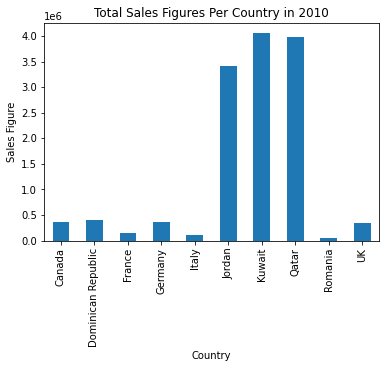

In [223]:
# Sales for the year of 2010 across all countries

# combine all countries...
sales_df = [sales_eu_df, sales_me_df, sales_na_df]
combined_sales_df = pd.concat(sales_df, keys=['Europe', 'Middle East', 'North America'], names=['Regions','Entry'])

# ...and filter combined countries by 2010
combined_sales_2010_df = combined_sales_df[combined_sales_df['year']==2010]

# group by country
country_sales_df = combined_sales_2010_df.groupby('country')['sales_figure'].sum()
country_sales_df

# bar chart
country_sales_df.plot.bar()
plt.title('Total Sales Figures Per Country in 2010')
plt.ylabel('Sales Figure')
plt.xlabel('Country')

Text(0.5, 0, 'Region')

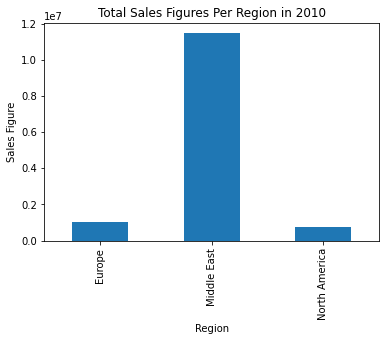

In [224]:
# Sales for the year of 2010 across each region (i.e. North America, Europe,...)
region_sales_2010 = combined_sales_2010_df.groupby('Regions')['sales_figure'].sum()
region_sales_2010.plot.bar()
plt.title('Total Sales Figures Per Region in 2010')
plt.ylabel('Sales Figure')
plt.xlabel('Region')


Text(0.5, 0, 'Month')

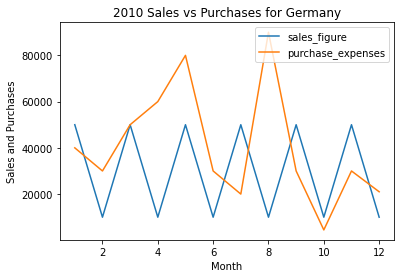

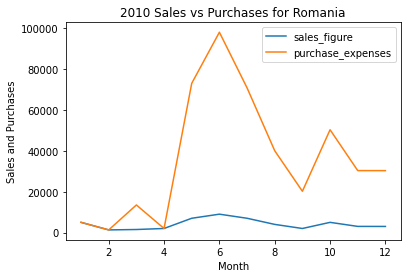

In [225]:
# filter year 2010 sales and purchases in eu
sales_eu_2010_df = sales_eu_df[sales_eu_df['year']==2010]
purchases_eu_2010_df = purchases_eu_df[purchases_eu_df['year']==2010]


# combine only the countries that have both sales and purchases for 2010
sales_purchases_2010_df = sales_eu_2010_df.merge(purchases_eu_2010_df,how='inner',)

# Germany and Romania returned from above merge. Filer per country below
germany_2010_df = sales_purchases_2010_df[sales_purchases_2010_df.country == 'Germany']
romania_2010_df = sales_purchases_2010_df[sales_purchases_2010_df.country == 'Romania']  

# Plot
germany_2010_df.plot(x='month', y=['sales_figure', 'purchase_expenses'])
plt.title('2010 Sales vs Purchases for Germany')
plt.ylabel('Sales and Purchases')
plt.xlabel('Month')

romania_2010_df.plot(x='month', y=['sales_figure', 'purchase_expenses'])
plt.title('2010 Sales vs Purchases for Romania')
plt.ylabel('Sales and Purchases')
plt.xlabel('Month')


In [226]:
# Same as above but using plotly
germany_fig = px.line(germany_2010_df, x='month', y=['sales_figure', 'purchase_expenses'],title='2010 Sales vs Purchases for Germany')
germany_fig.show()

romania_fig = px.line(romania_2010_df, x='month', y=['sales_figure', 'purchase_expenses'],title='2010 Sales vs Purchases for Romania')
romania_fig.show()

In [227]:
# Same as above but with plotly bar chart
germany_bar_fig = px.bar(germany_2010_df, x='month', y=['sales_figure', 'purchase_expenses'],title='2010 Sales vs Purchases for Germany')
germany_bar_fig.show()

romania_bar_fig = px.bar(romania_2010_df, x='month', y=['sales_figure', 'purchase_expenses'],title='2010 Sales vs Purchases for Romania')
romania_bar_fig.show()

Text(0.5, 1.0, 'All Total Sales Figures Per Country')

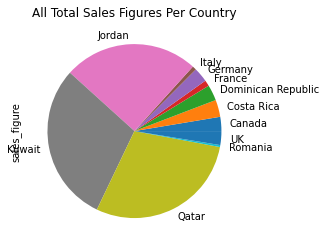

In [228]:
# pie chart for all countries listed with sum total of sales
sum_of_all_country_sales_df = combined_sales_df.groupby('country')['sales_figure'].sum()
sum_of_all_country_sales_df.plot.pie()
plt.title("All Total Sales Figures Per Country")

Text(0.5, 1.0, 'Top Total Sales Figures In Europe')

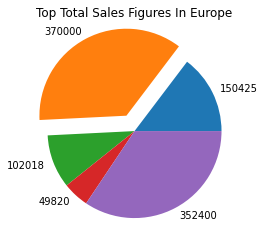

In [229]:
top_countries_in_eu_df = combined_sales_df.loc['Europe'].groupby('country')['sales_figure'].sum()
plt.pie(top_countries_in_eu_df, labels=top_countries_in_eu_df, explode=(top_countries_in_eu_df == max(top_countries_in_eu_df)) * 0.2)
plt.show
plt.title("Top Total Sales Figures In Europe")

Text(0.5, 1.0, 'Top Total Sales Figures In Middle East')

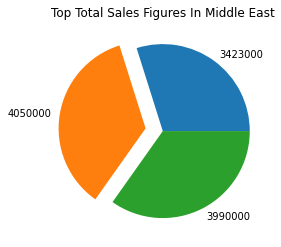

In [230]:
top_countries_in_me_df = combined_sales_df.loc['Middle East'].groupby('country')['sales_figure'].sum()
plt.pie(top_countries_in_me_df, labels=top_countries_in_me_df, explode=(top_countries_in_me_df == max(top_countries_in_me_df)) * 0.2)
plt.show
plt.title("Top Total Sales Figures In Middle East")

Text(0.5, 1.0, 'Top Total Sales Figures In North America')

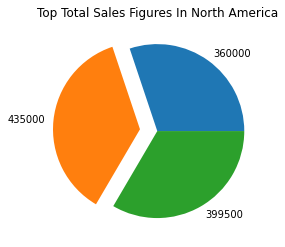

In [231]:
top_countries_in_na_df = combined_sales_df.loc['North America'].groupby('country')['sales_figure'].sum()
plt.pie(top_countries_in_na_df, labels=top_countries_in_na_df, explode=(top_countries_in_na_df == max(top_countries_in_na_df)) * 0.2)
plt.show
plt.title("Top Total Sales Figures In North America")